> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

In [10]:
library(MASS) #lm.ridge 
library(car) #vif

In [16]:
library(glmnet) #Ridge, Lasso

Loading required package: Matrix

Loaded glmnet 4.1-7



# 완전한 다중공선성 (perfect multicollinearity)

## 완전한 다중공산성을 갖는 데이터 생성

In [18]:
gen_perfect_collin_data = function(num_samples = 100) {
     x1 = rnorm(n = num_samples, mean = 80, sd = 10)
     x2 = rnorm(n = num_samples, mean = 70, sd = 5)
     x3 = 2 * x1 + 4 * x2 + 3
     y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)  
    data.frame(y, x1, x2, x3)
    }

- x1과 x2는 independent

- x3는 선형결합

In [19]:
set.seed(42)
perfect_collin_data = gen_perfect_collin_data() 
head(perfect_collin_data)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,170.7135,93.70958,76.00483,494.4385
2,152.9106,74.35302,75.22376,452.6011
3,152.7866,83.63128,64.98396,430.1984
4,170.6306,86.32863,79.24241,492.6269
5,152.3320,84.04268,66.66613,437.7499
6,151.3155,78.93875,70.52757,442.9878


In [20]:
round(cor(perfect_collin_data),4)

,y,x1,x2,x3
y,1.0000,0.9112,0.4307,0.9558
x1,0.9112,1.0000,0.0313,0.7639
x2,0.4307,0.0313,1.0000,0.6690
x3,0.9558,0.7639,0.6690,1.0000


In [21]:
perfect_collin_fit = lm(y ~ x1 + x2 + x3, data = perfect_collin_data) 
summary(perfect_collin_fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
x3                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


- p-value값 유의하게 나오고, $R^2$값도 크다.

- $rank(X)=3$(x3가 x1과 x2의 선형결합으로 이루어진 변수이므로)

- $\rightarrow (X^TX)^{-1}$값을 구할 수 없으므로 $\hat \beta$값을 구할 수 없다. 그래서 R에서는 한 개의 변수를 빼고 lm을 돌린다. 



In [22]:
fit1 = lm(y ~ x1 + x2, data = perfect_collin_data) 
fit2 = lm(y ~ x1 + x3, data = perfect_collin_data) 
fit3 = lm(y ~ x2 + x3, data = perfect_collin_data)



- x3는 선형결합으로 이루어진 변수이므로 위 예시에서 두 개의 변수만 안다는 것은 세 개의 변수를 안다는 것과 동치

In [23]:
summary(fit1)


Call:
lm(formula = y ~ x1 + x2, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


In [24]:
summary(fit2)


Call:
lm(formula = y ~ x1 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.194542   1.750225   1.254    0.213    
x1          0.477100   0.015158  31.475   <2e-16 ***
x3          0.254265   0.005636  45.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


- $y=\beta_0 + \beta_1x_1 + \beta_2 x_3 + \epsilon$

- $x_3 = 2x_1+4x_2+3$ 대입

- $y=\beta_0 +\beta_1x_1 + 2\beta_2x_1 + 4\beta_2 x_2 + 3\beta_2 = (\beta_0 + 3\beta_2)+(\beta_1+2\beta_2)x_1 + 4\beta_2 x_2$

- 계수가 좀 달라지지만 x1과 x2의 식으로 다시 써질 수 있음

In [25]:
summary(fit3)


Call:
lm(formula = y ~ x2 + x3, data = perfect_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.478892   1.741452   0.849    0.398    
x2          -0.954200   0.030316 -31.475   <2e-16 ***
x3           0.492815   0.004894 100.702   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


- fit1, fit2, fit3의 $R^2$가 다 똑같다. 모형의 적합도가 동일하다.

In [26]:
all.equal(fitted(fit1), fitted(fit2))

[1] TRUE

In [27]:
all.equal(fitted(fit2), fitted(fit3))

[1] TRUE

- `all.equal`: 동일한 함수이냐?

In [28]:
coef(fit1)

(Intercept)          x1          x2 
  2.9573357   0.9856291   1.0170586

In [29]:
coef(fit2)

(Intercept)          x1          x3 
  2.1945418   0.4770998   0.2542647

In [30]:
coef(fit3)

(Intercept)          x2          x3 
  1.4788921  -0.9541995   0.4928145

# 완전에 가까운 다중공선성 (approximate multicollinearity)

## 완전에 가까운 다중공선성을 갖는 데이터 생성

In [31]:
gen_almost_collin_data = function(num_samples = 100) {
    x1 = rnorm(n = num_samples, mean = 0, sd = 2)
    x2 = rnorm(n = num_samples, mean = 0, sd = 3)
    x3 = 3*x1 + 1*x2 + rnorm(num_samples, mean=0, sd=0.5)
    y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)  
    data.frame(y, x1, x2, x3)
    }

- rank(X)=4가 된다. 약간의  noise가 있음

In [34]:
set.seed(42)
almost_collin_data = gen_almost_collin_data() 
head(almost_collin_data)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,9.3401923,2.7419169,3.6028961,10.82818219
2,5.7650991,-1.1293963,3.1342533,-0.08704717
3,0.7556218,0.7262568,-3.0096259,-0.24519291
4,10.5462431,1.2657252,5.5454457,10.37239096
5,1.6617438,0.8085366,-2.0003202,-0.26314109
6,3.0464051,-0.2122490,0.3165414,-0.89563344


In [33]:
round(cor(almost_collin_data),3)

,y,x1,x2,x3
y,1.000,0.616,0.769,0.863
x1,0.616,1.000,0.031,0.913
x2,0.769,0.031,1.000,0.429
x3,0.863,0.913,0.429,1.000


In [35]:
m <- lm(y~., almost_collin_data) 

In [36]:
summary(m)


Call:
lm(formula = y ~ ., data = almost_collin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7944 -0.5867 -0.1038  0.6188  2.3280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03150    0.08914  34.007  < 2e-16 ***
x1           1.21854    0.52829   2.307   0.0232 *  
x2           1.06616    0.18314   5.821 7.71e-08 ***
x3          -0.06322    0.17765  -0.356   0.7227    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8867 on 96 degrees of freedom
Multiple R-squared:  0.9419,	Adjusted R-squared:  0.9401 
F-statistic:   519 on 3 and 96 DF,  p-value: < 2.2e-16


- 모형은 유의하고, $R^2$값도 큰 편

- 설명변수들은 별로 유의하지 않다.(x1과 x3).. 다중공산성이 있기 떄문에

- 위의 fit3와 비교해보면, std.Error값이 많이 커진 것을 볼 수 있음. x2의 std.Error값 (0.03 -> 0.183) x3의 std.Error값 (0.005 -> 0.1777)

In [37]:
vif(m)

x1        x2        x3 
152.42684  31.07349 186.71999

- vif>10 이면 다중공산성이 있다.

- `Std. Error` 값이 커진다. -> 불안정해짐. 과녁중앙에서 벗어나게..

`-` y에 noise

In [38]:
set.seed(1000)
noise <- rnorm(n = 100, mean = 0, sd =0.5) 
m_noise <- lm(y+noise~., almost_collin_data) 
summary(m_noise)


Call:
lm(formula = y + noise ~ ., data = almost_collin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0962 -0.6998 -0.0891  0.7726  2.8462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0403     0.1020  29.815  < 2e-16 ***
x1            0.9894     0.6043   1.637    0.105    
x2            0.9898     0.2095   4.725 7.88e-06 ***
x3            0.0158     0.2032   0.078    0.938    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 96 degrees of freedom
Multiple R-squared:  0.9259,	Adjusted R-squared:  0.9236 
F-statistic:   400 on 3 and 96 DF,  p-value: < 2.2e-16


In [39]:
round(coef(m),3)

(Intercept)          x1          x2          x3 
      3.032       1.219       1.066      -0.063

In [40]:
round(coef(m_noise),3)

(Intercept)          x1          x2          x3 
      3.040       0.989       0.990       0.016

- m과 m_noise를 비교해보기

- 다중공산성이 없는 경우와 비교해보았을때, 위 coef의 값은 서로 차이가 많이 있음

## 다중공선성이 없는 경우 비교

In [41]:
m1 <- lm(y~x1+x2, almost_collin_data)
m1_noise <- lm(y+noise~x1+x2, almost_collin_data)

In [42]:
vif(m1)

x1       x2 
1.000979 1.000979

In [43]:
round(coef(m1),3)

(Intercept)          x1          x2 
      3.031       1.031       1.002

- $y$~$x_1+x_2$

In [44]:
round(coef(m1_noise),3)

(Intercept)          x1          x2 
      3.040       1.036       1.006

- $y+noise$~$x_1+x_2$

- 다중공산성이 없는 경우 noise를 추가해도 회귀계수가 별 차이가 업승ㅁ

$$VIF = \dfrac{1}{1-R_j^2}$$

`-` VIF구하는 식

In [46]:
m_sub <- lm(x3~x1+x2,almost_collin_data)

In [47]:
c33 <- 1/(1-summary(m_sub)$r.sq);c33 ##vif

[1] 186.72

In [48]:
vif(m)

x1        x2        x3 
152.42684  31.07349 186.71999

# 실제 데이터 분석

In [49]:
dt <- data.frame(scale(mtcars)) 
dim(dt)

[1] 32 11

- n=32

- p=10

- 11=p+y=10+1

In [50]:
head(dt)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


`-` 연비계산 데이터

[, 1] mpg Miles/(US) gallon = `y`

[, 2] cyl Number of cylinders

[, 3] disp Displacement (cu.in.)

[, 4] hp Gross horsepower

[, 5] drat Rear axle ratio

[, 6] wt Weight (1000 lbs)

[, 7] qsec 1/4 mile time

[, 8] vs Engine (0 = V-shaped, 1 = straight)

[, 9] am Transmission (0 = automatic, 1 = manual)[,10] gear Number of forward gears

[,11] carb Number of carburetors

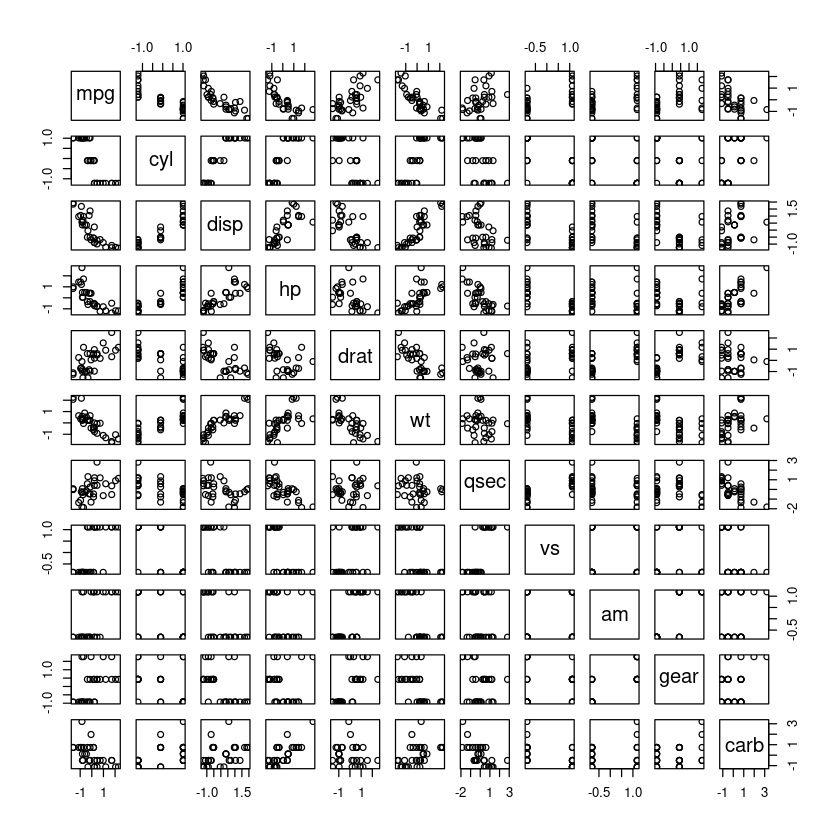

In [51]:
pairs(dt)

In [52]:
round(cor(dt),2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


- 전반적으로 corr이 높음, 다중공산성 생각!

In [53]:
cars_fit_lm <- lm(mpg~., dt) 
summary(cars_fit_lm)


Call:
lm(formula = mpg ~ ., data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57254 -0.26620 -0.01985  0.20230  0.76773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.613e-17  7.773e-02   0.000   1.0000  
cyl         -3.302e-02  3.097e-01  -0.107   0.9161  
disp         2.742e-01  3.672e-01   0.747   0.4635  
hp          -2.444e-01  2.476e-01  -0.987   0.3350  
drat         6.983e-02  1.451e-01   0.481   0.6353  
wt          -6.032e-01  3.076e-01  -1.961   0.0633 .
qsec         2.434e-01  2.167e-01   1.123   0.2739  
vs           2.657e-02  1.760e-01   0.151   0.8814  
am           2.087e-01  1.703e-01   1.225   0.2340  
gear         8.023e-02  1.828e-01   0.439   0.6652  
carb        -5.344e-02  2.221e-01  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4397 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 1

- 모형은 유의하지만 모든 회귀계수가 유의하지 않게 나옴.

- `p-value`: $H_0:\beta_1=\dots=\beta_10=0$ 한개라도 0이 아닌 회귀계수가 존재한다는 뜻이지만 회귀계수 보면 엥 없음.

In [54]:
vif(cars_fit_lm)

cyl      disp        hp      drat        wt      qsec        vs        am 
15.373833 21.620241  9.832037  3.374620 15.164887  7.527958  4.965873  4.648487 
     gear      carb 
 5.357452  7.908747

- cyl, disp, wt 가 vif값이 높게 나옴.

# 능형회귀 (Ridge Regression)

## lm.ridge 함수 이용

In [55]:
rfit <- lm.ridge(mpg~., dt, lambda=seq(0.01,20,0.1))

- $\hat\beta(\lambda) = (X^TX+\lambda I_p)^{-1} X^Ty$

- 람다 범위는 0.01~0.1 범위에서 정해줘.

In [56]:
select(rfit) 

modified HKB estimator is 2.58585 
modified L-W estimator is 1.837435 
smallest value of GCV  at 14.91 


- 람다 값 몇개 추전해주는 함수. `smallest value of GCV ` 이것을 많이 씀

- MSE를 가장 작게 하는 $\lambda$값을 찾아줘! GCV

In [57]:
round(rfit$coef[,rfit$lam=='0.21'],3)

cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
-0.032  0.185 -0.211  0.074 -0.520  0.207  0.027  0.201  0.082 -0.093

- 람다=0.21일 때

In [58]:
round(rfit$coef[,rfit$lam=='3.21'],3)

cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
-0.078 -0.049 -0.144  0.086 -0.291  0.085  0.041  0.169  0.075 -0.175

In [59]:
round(rfit$coef[,rfit$lam=='14.91'],3)

cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
-0.109 -0.107 -0.130  0.092 -0.197  0.047  0.063  0.132  0.066 -0.144

- $\hat \beta(14.91)$

- $\hat \beta^{Ridge}(\lambda) = argmin\{\sum \epsilon_i^2\}$

- $\sum \beta_j^2 \leq t$

- $min\{\sum \epsilon_i^2 + \lambda \sum \beta_j^2 \}$

`-` 람다의 값이 커질 때, $\sum \hat \beta_j^2$의 계수 값은 작아진다.

In [60]:
sum(rfit$coef[,rfit$lam=='0.21']^2)

[1] 0.4556705

- 람다=0.21 일 때 $\sum \hat \beta_j^2$의 계수값

In [61]:
sum(rfit$coef[,rfit$lam=='3.21']^2)

[1] 0.1950265

- 람다=3.21 일 때 $\sum \hat \beta_j^2$의 계수값

In [62]:
sum(rfit$coef[,rfit$lam=='14.91']^2)

[1] 0.1359894

- 람다=14.91 일 때 $\sum \hat \beta_j^2$의 계수값

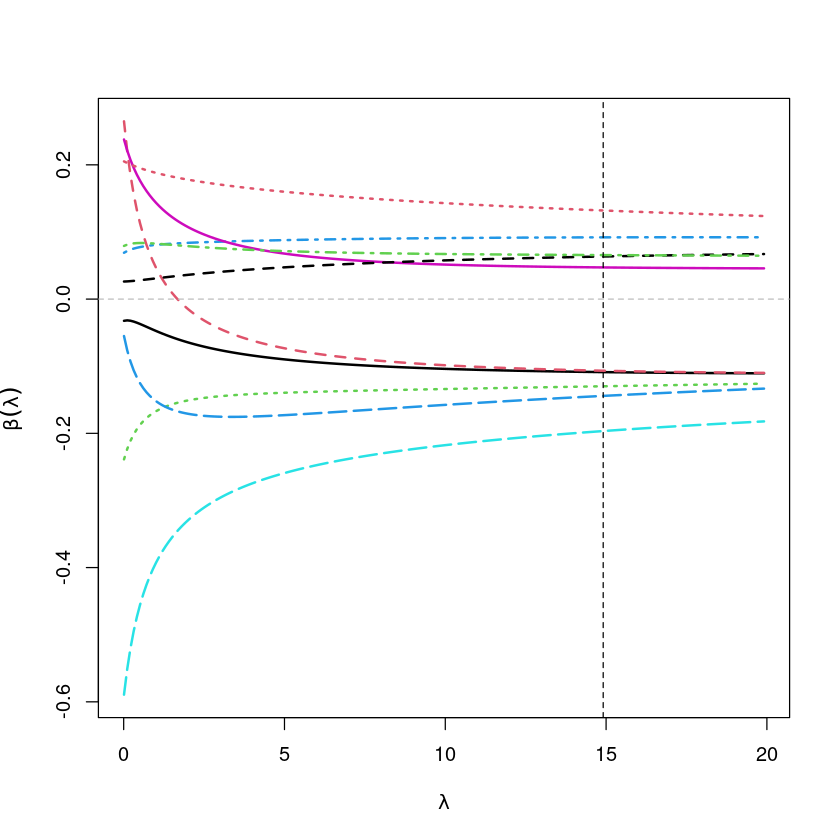

In [65]:
matplot(rfit$lambda, t(rfit$coef), type='l',
        xlab=expression(lambda),
        ylab=expression(bold(beta)(lambda)), lwd=2) 
abline(h=0, col="grey", lty=2)
abline(v=14.91, col="black", lty=2)

## glmnet 함수 이용

- 매트릭스를 만들어 줘야 함!

- 그런데 X하뭇에서 1열은 필요 없음(1 1 1 1 .. 이렇게 되어있는) 그래서 아래와 같이 [,-1]로 X(상수항 빠짐)를 가져옴

In [66]:
X <- model.matrix(mpg~., dt)[,-1] 
y <- dt$mpg

- X <- as.matrix(dt[,-1]) 해도 같은 결과 나올듯

In [67]:
head(X)

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


In [69]:
head(y)  #mpg

[1]  0.1508848  0.1508848  0.4495434  0.2172534 -0.2307345 -0.3302874

## Lidge

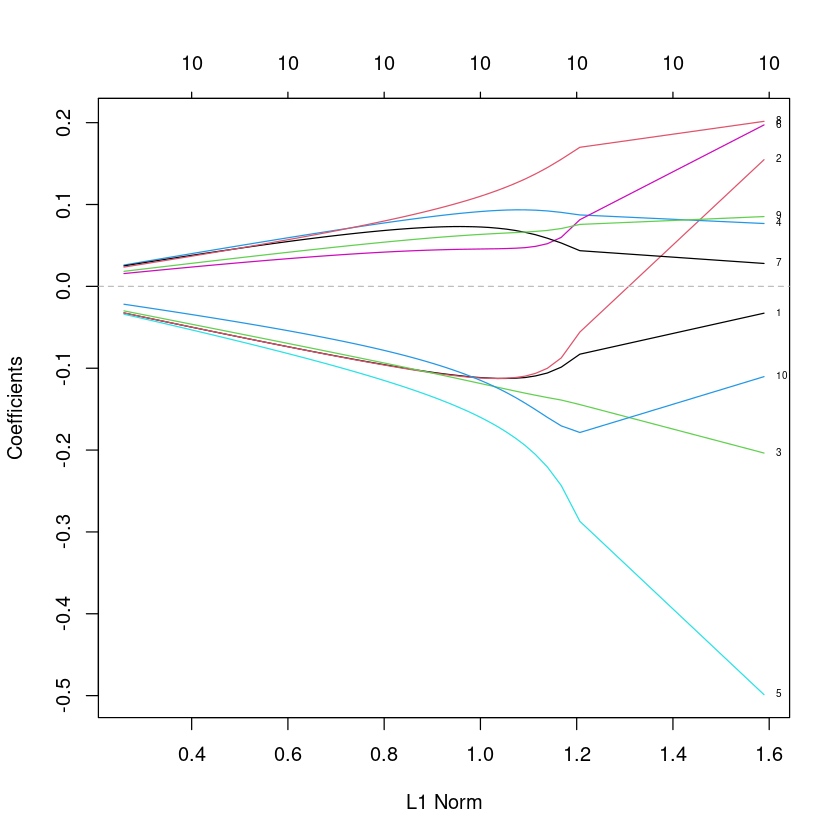

In [70]:
ridge.fit<-glmnet(X,y,alpha=0, lambda=seq(0.01,20,0.1)) ##ridge : alpha=0 
plot(ridge.fit, label=TRUE)
abline(h=0, col="grey", lty=2)

- 위 plot에서 xlabel이 L1 Norm아님. $\sum |\beta_j|$

`-` 최소제곱추정량을 구할 때의 제약 조건 

- 릿지 $\sum \beta_j^2 \leq t$ : $L_2$-norm

- 라쏘 $\sum |\beta_j| \leq t$ : $L_1$-norm

- 그런데 릿지 라쏘의 중간 정도를 제약 조건을 주면 어쩔까? 싶어서 나온...

$$(1-\alpha)\sum \beta_j^2 + \alpha \sum|\beta_j| \leq t$$

- $\alpha=0$이라면 뒷 부분으 날라가니까 $Ridge$를 쓴다는 것이고, $\alpha=1$이라면 앞부분 날라가서 $Rasso$를 쓴다는 뜻

`-` 람다를 크게하면서 MSE값이 작아지려면?

`Loocv`

In [73]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=length(y))

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


In [74]:
cv.fit


Call:  cv.glmnet(x = X, y = y, nfolds = length(y), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.4558    82  0.2020 0.05006      10
1se 1.8399    67  0.2465 0.07432      10

- cross validatiom

- MSE기준으로 람다가 0.4558일때 MSE가 가장 작음

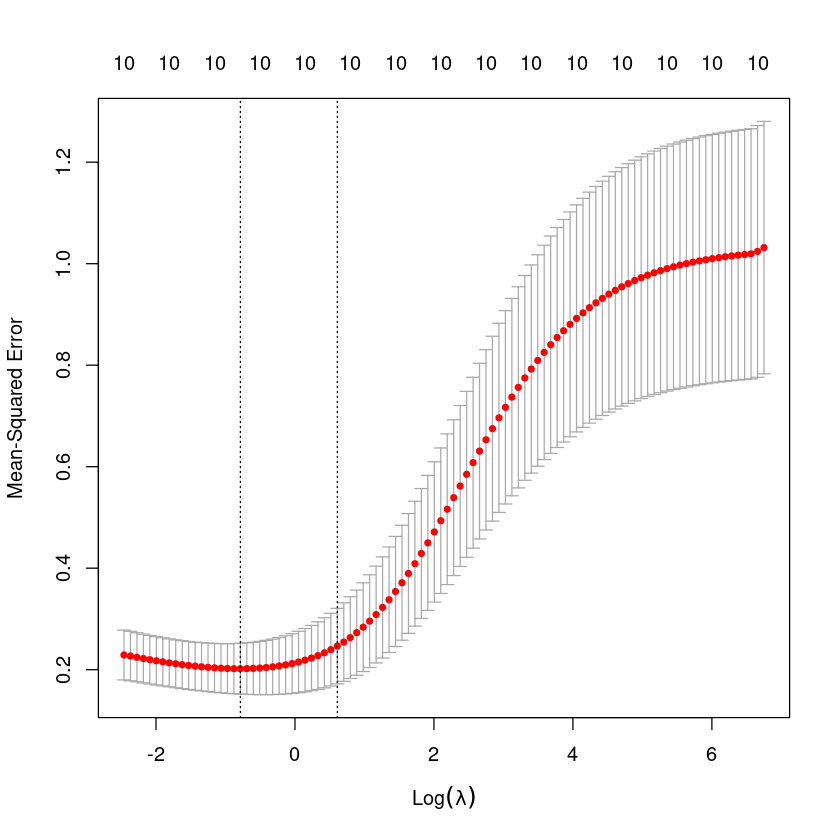

In [75]:
plot(cv.fit)

- 가장 작아지는 값 log(0.4558)=-0.7857

- log(1.8399)=0.6097

In [76]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=10) 
cv.fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.5002    81  0.2169 0.05967      10
1se 2.2161    65  0.2764 0.10178      10

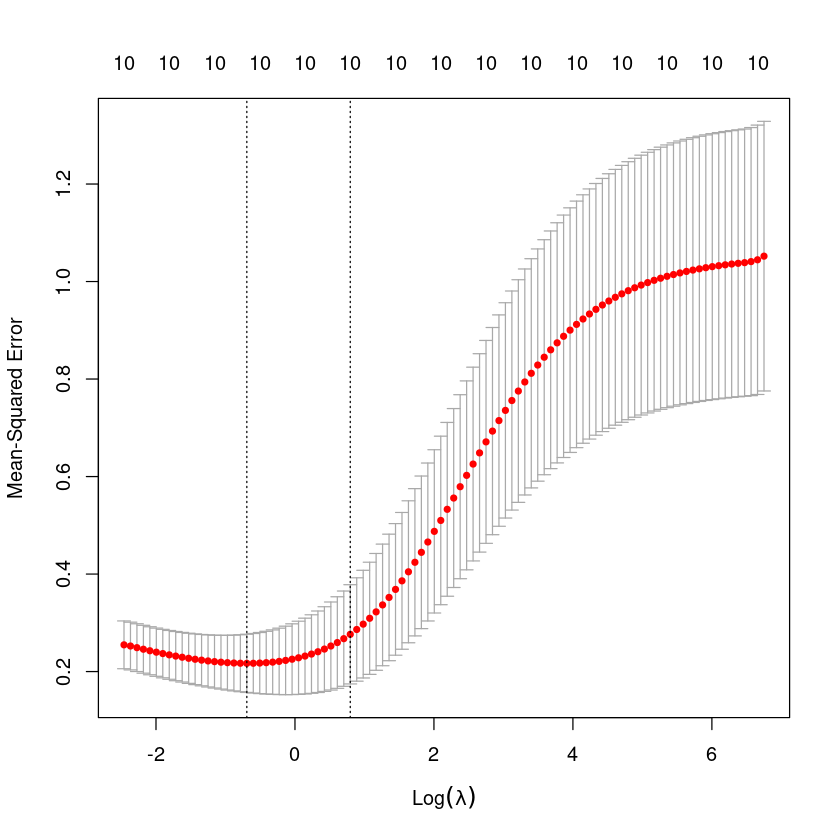

In [77]:
plot(cv.fit)

In [78]:
lam<-cv.fit$lambda.min;lam

[1] 0.5001864

In [79]:
log(lam)

[1] -0.6927744

`-` $\hat \beta(\lambda)$의 추정량

In [80]:
predict(ridge.fit,type="coefficients",s=lam)

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  8.350503e-17
cyl         -1.111861e-01
disp        -1.093455e-01
hp          -1.307062e-01
drat         9.342524e-02
wt          -1.954335e-01
qsec         4.746741e-02
vs           6.573455e-02
am           1.317846e-01
gear         6.643998e-02
carb        -1.434548e-01

- 옵션 타입을 'coefficients' 주어야 $\hat \beta(\lambda)$의 추정량을 구할 수 있다.

- 옵션 타입을 'response'를 쓰게 되면 $\hat y$값을 구할 수 있다.

In [88]:
predict(ridge.fit,type="response",s=lam)

ERROR: Error in predict.glmnet(ridge.fit, type = "response", s = lam): You need to supply a value for 'newx'


- `s1`: $\hat \beta (0.5)$

- $\hat y = X \hat \beta (0.5)$

## Lasso

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


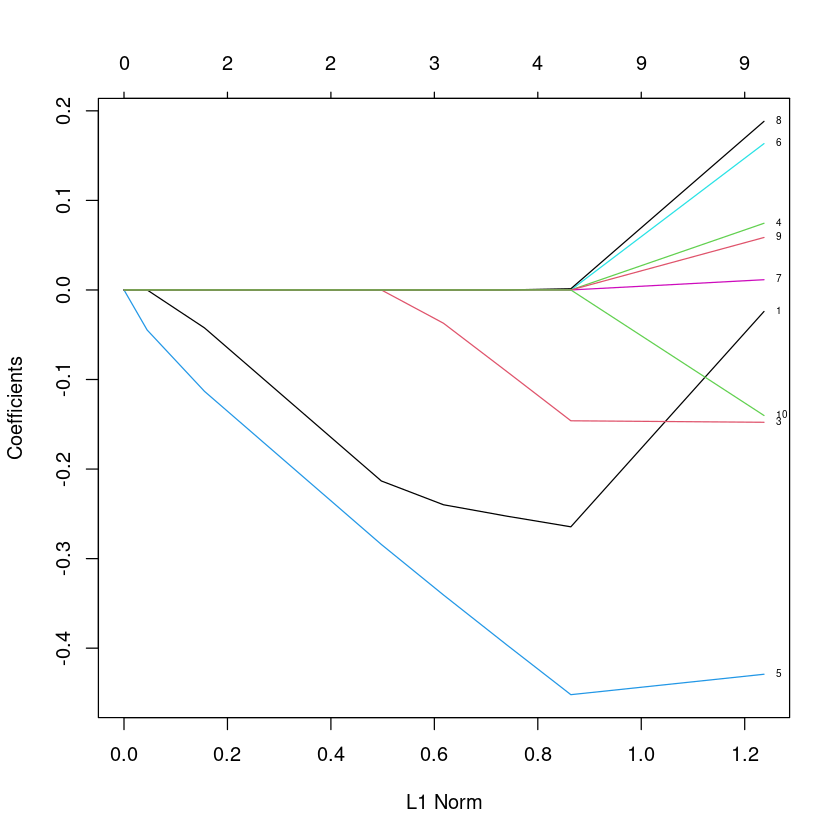

In [81]:
lasso.fit<-glmnet(X,y,alpha=1, lambda=seq(0.01,20,0.1)) ##lasso : alpha=1 
plot(lasso.fit, label=TRUE)

- 8번 보면 가다가 0이 됨. (릿지는 0으로 수렴하긴 했지만 아예 0은 아니였는데..)

- 제약조건을 걸면 변수를 포기해버림 (9개 -> 9개 -> 4개 -> 3개 -> 2개 ->)

In [82]:
cv.lasso.fit<-cv.glmnet(X,y,alpha=1,nfolds=10) 
cv.lasso.fit


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure      SE Nonzero
min 0.1005    24  0.2252 0.05178       5
1se 0.2322    15  0.2697 0.07727       3

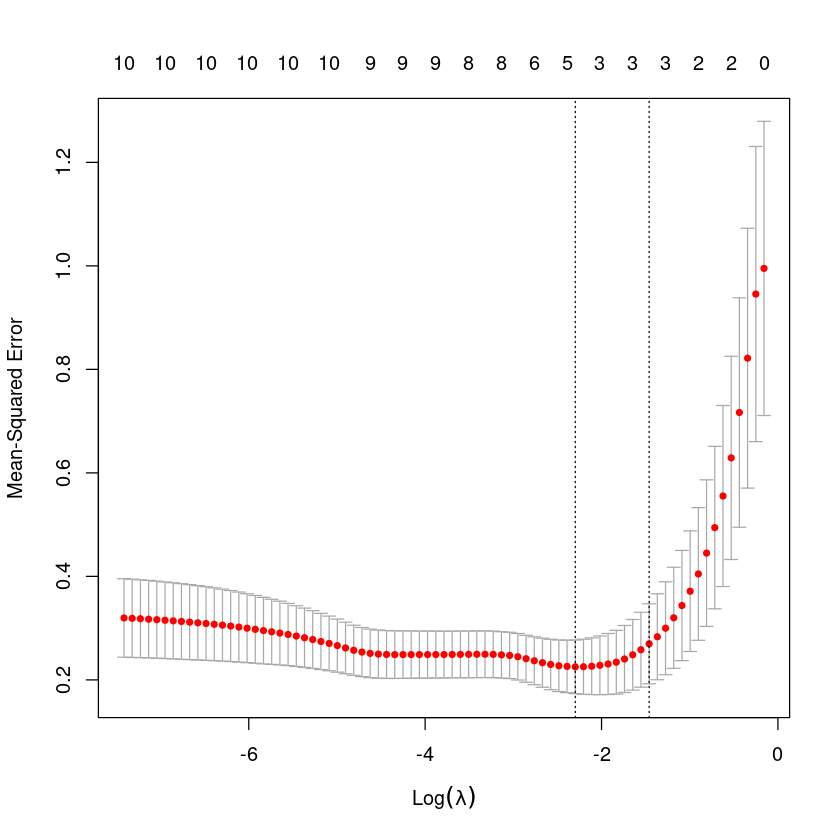

In [83]:
plot(cv.lasso.fit)